In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import numpy as np
import timebudget
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)

<module 'rltrain' from '/Users/leodirac/dev/ddpg/rltrain.py'>

In [3]:
env = gym.make('CartPole-v0')
learner = rltrain.DQN(env)

Creating FCNet with 6->1 dims for 4 observations and 2 actions


In [4]:
def dist_rollouts(eps:float, n:int=100) -> [list, list]:
    learner.eps = eps
    frames = []
    rewards = []
    for i in range(100):
        f, r = learner.rollout(render=False)
        frames.append(f)
        rewards.append(r)
    plt.hist(rewards, bins=20)
    plt.show()
    print(f"Reward mean,std = {np.mean(rewards):.3f} +/- {np.std(rewards):.3f}")
    return rewards, frames



Eps = 1.00
Loss = 0.66168
Loss = 10.06459
Loss = 40.64114
Loss = 0.70581
Loss = 0.65448
Loss = 12.28586
Loss = 11.63466
Loss = 20.51576
Loss = 0.67137
Loss = 0.64392
Loss = 0.70432


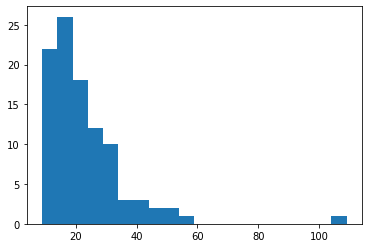

Reward mean,std = 22.500 +/- 13.283


Eps = 0.91
Loss = 9.78364
Loss = 31.64405
Loss = 39.56911
Loss = 10.56810
Loss = 0.66954
Loss = 11.85874
Loss = 30.14663
Loss = 0.69191
Loss = 9.74429
Loss = 19.44402


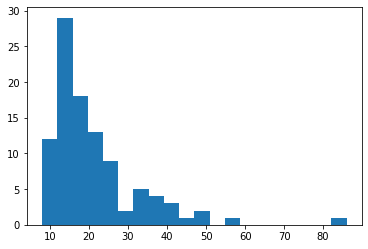

Reward mean,std = 21.140 +/- 11.887


Eps = 0.83
Loss = 0.66084
Loss = 19.70998
Loss = 20.86446
Loss = 0.68607
Loss = 14.88400
Loss = 18.34001
Loss = 27.12176
Loss = 19.91802
Loss = 9.96515


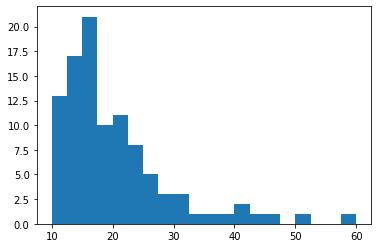

Reward mean,std = 20.130 +/- 9.145


Eps = 0.74
Loss = 9.20759
Loss = 18.11670
Loss = 10.47721
Loss = 0.68344
Loss = 0.71856
Loss = 9.54251
Loss = 8.72230
Loss = 10.01328
Loss = 18.17789


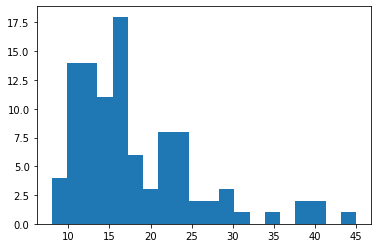

Reward mean,std = 18.060 +/- 7.652


Eps = 0.65
Loss = 0.67513
Loss = 9.50440
Loss = 50.30012
Loss = 28.98674
Loss = 15.36432
Loss = 18.60501
Loss = 8.39203
Loss = 8.26798
Loss = 28.92751


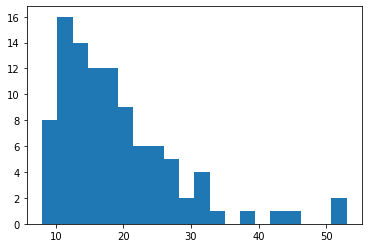

Reward mean,std = 19.060 +/- 8.859


Eps = 0.57
Loss = 29.71534
Loss = 9.14201
Loss = 0.69360
Loss = 32.42737
Loss = 7.89837
Loss = 8.11883
Loss = 34.39154
Loss = 8.93748


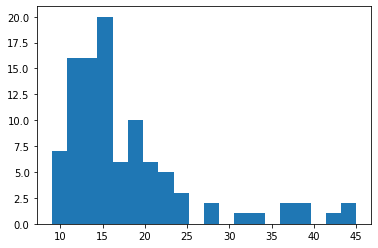

Reward mean,std = 17.660 +/- 7.836


Eps = 0.48
Loss = 16.22135
Loss = 16.85600
Loss = 0.70288
Loss = 8.32977
Loss = 8.05428
Loss = 8.98225
Loss = 8.66037
Loss = 7.88836


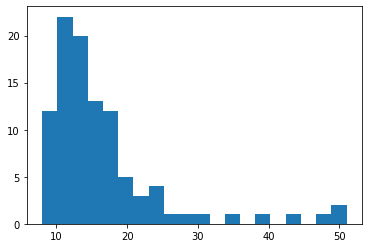

Reward mean,std = 16.600 +/- 8.418


Eps = 0.39
Loss = 16.86684
Loss = 0.75951
Loss = 26.21420
Loss = 16.03707
Loss = 7.97870
Loss = 16.49868
Loss = 0.75678
Loss = 7.14514


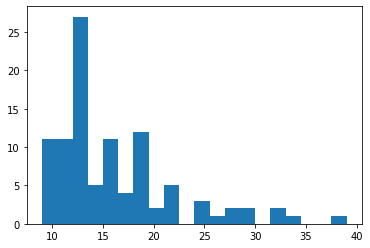

Reward mean,std = 15.910 +/- 6.042


Eps = 0.30
Loss = 0.72222
Loss = 8.13819
Loss = 16.71938
Loss = 0.72118
Loss = 0.70290
Loss = 16.60823


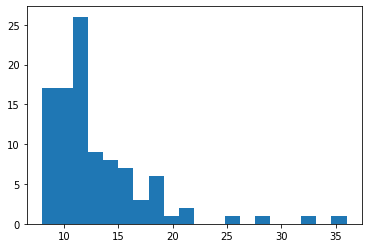

Reward mean,std = 12.950 +/- 4.788


Eps = 0.22
Loss = 0.69173
Loss = 0.67739
Loss = 8.16322
Loss = 30.56834
Loss = 0.70015
Loss = 16.42781


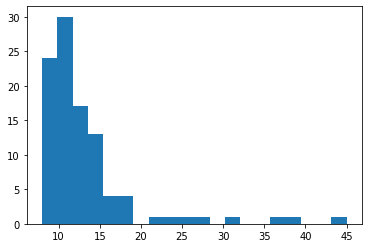

Reward mean,std = 13.150 +/- 6.301


In [12]:
N = 10
for d in range(N):
    eps = 1.0 - d/(N+1.5)
    print(f"\n\nEps = {eps:.2f}")
    _ = dist_rollouts(eps)

In [13]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%   167.54ms/cyc @     1.0 calls/cyc
              do_learning:  98.9%   165.76ms/cyc @    18.3 calls/cyc
                 q_target:  86.5%   144.98ms/cyc @    18.3 calls/cyc
                optimizer:   4.2%     7.10ms/cyc @    18.3 calls/cyc
                   sample:   1.5%     2.51ms/cyc @    18.3 calls/cyc


7.3243794441223145 +/- 3.38372802734375


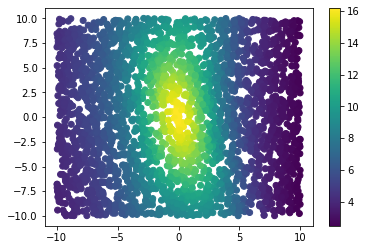

In [19]:
N = 3000
ob = (torch.rand(N,4) - 0.5) * 20
ob[:,0:2] *= 0
qb = learner.qnet.calc_qval_batch(ob,[1] * N)
print(f"{torch.mean(qb)} +/- {torch.std(qb)}")
#_ = plt.hist(qb.cpu().detach().numpy(), bins=50)
fix = lambda t: t.cpu().detach().numpy()
ob = fix(ob)
qb = fix(qb)
plt.scatter(x=ob[:,2],y=ob[:,3], c=qb[:,0])
plt.colorbar()

7.225637912750244 +/- 3.401740550994873


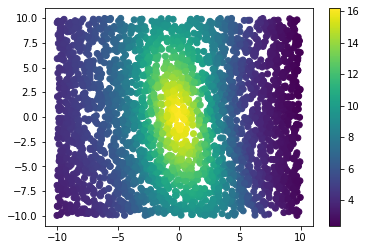

In [20]:
N = 3000
ob = (torch.rand(N,4) - 0.5) * 20
ob[:,0:2] *= 0
qb = learner.qnet.calc_qval_batch(ob,[0] * N)
print(f"{torch.mean(qb)} +/- {torch.std(qb)}")
#_ = plt.hist(qb.cpu().detach().numpy(), bins=50)
fix = lambda t: t.cpu().detach().numpy()
ob = fix(ob)
qb = fix(qb)
plt.scatter(x=ob[:,2],y=ob[:,3], c=qb[:,0])
plt.colorbar()

Loss = 15.64854
Loss = 7.28297
Loss = 23.76587
Loss = 21.83481
Loss = 5.86488
Loss = 8.03329


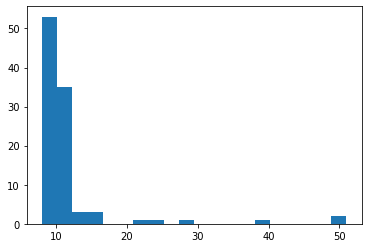

Reward mean,std = 11.960 +/- 6.823


In [18]:
_ = dist_rollouts(0)

Loss = 0.70059
Loss = 13.52544
Loss = 0.73056
Loss = 6.94493
Loss = 26.97289
Loss = 19.43616
Loss = 6.16129
Loss = 12.88626
Loss = 12.92541
Loss = 6.50765
Loss = 13.58853


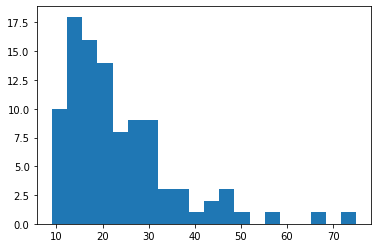

Reward mean,std = 23.590 +/- 12.020


In [17]:
_ = dist_rollouts(1)